In [1]:
from langchain_core.messages import AIMessage, SystemMessage, HumanMessage

In [2]:
messages = [
    SystemMessage('You are an intelligent math solver'),
    HumanMessage('What is the value of 2 multiplied by 10 ?'),
    AIMessage('The value of 2 * 10 = 20')
]

In [3]:
messages

[SystemMessage(content='You are an intelligent math solver', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='What is the value of 2 multiplied by 10 ?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='The value of 2 * 10 = 20', additional_kwargs={}, response_metadata={})]

In [4]:
for msg in messages:
    msg.pretty_print()

================================ System Message ================================

You are an intelligent math solver
================================ Human Message =================================

What is the value of 2 multiplied by 10 ?
================================== Ai Message ==================================

The value of 2 * 10 = 20


In [5]:
from langchain_google_genai.chat_models import ChatGoogleGenerativeAI

In [6]:
import os
os.environ["GOOGLE_API_KEY"] = "<YOUR_API_KEY>"

In [7]:
chat_model = ChatGoogleGenerativeAI(model="gemini-2.0-flash")

In [8]:
messages.append(HumanMessage('What is the value of 2 divided by 10 ?'))

In [9]:
chat_model.invoke(messages)

AIMessage(content='2 divided by 10 is 0.2.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': []}, id='run--e573dfae-811e-47a2-ba88-128208f88249-0', usage_metadata={'input_tokens': 45, 'output_tokens': 13, 'total_tokens': 58, 'input_token_details': {'cache_read': 0}})

##### LangGraph

In [10]:
from langgraph.graph import StateGraph, START, END
from langchain_core.messages import AnyMessage

In [11]:
from typing import TypedDict, List, Annotated
from langgraph.graph.message import add_messages

class Message(TypedDict):
    messages: Annotated[List[AnyMessage], add_messages]

In [12]:
def dot(a: int, b: int):
    '''
    Dot value of two numbers 'a' and 'b'
    :param a: 
    :param b: 
    :return: 
    '''
    return a * b

In [13]:
model_with_tools = chat_model.bind_tools([dot])

In [14]:
def tooled_llm(state : Message):
    return {"messages" : [model_with_tools.invoke(state["messages"])]}

In [15]:
graph = StateGraph(Message)

In [16]:
graph.add_node("tooled_llm", tooled_llm)

In [17]:
graph.add_edge(START, "tooled_llm")

In [18]:
graph.add_edge("tooled_llm", END)

In [19]:
graph = graph.compile()

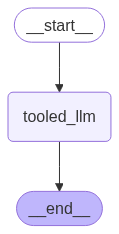

In [20]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [21]:
graph.invoke({"messages" : HumanMessage("Hello")})

{'messages': [HumanMessage(content='Hello', additional_kwargs={}, response_metadata={}, id='6ec2a6e5-c356-49cd-b00c-4f2be74b1f28'),
  AIMessage(content='Hello! How can I help you today?', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': []}, id='run--2ae4fb05-d2ab-4c50-b486-0e0d63efcb7a-0', usage_metadata={'input_tokens': 38, 'output_tokens': 10, 'total_tokens': 48, 'input_token_details': {'cache_read': 0}})]}

In [22]:
graph.invoke({"messages" : HumanMessage("Value of 2 + 3 ?")})

{'messages': [HumanMessage(content='Value of 2 + 3 ?', additional_kwargs={}, response_metadata={}, id='88cd0f81-13c9-4efd-ab88-10dc84bc6417'),
  AIMessage(content="I'm designed to calculate the dot product of two numbers. Would you like to calculate the dot product of 2 and 3?", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': []}, id='run--31c814c5-caf6-4720-9dae-236a96826997-0', usage_metadata={'input_tokens': 45, 'output_tokens': 29, 'total_tokens': 74, 'input_token_details': {'cache_read': 0}})]}

In [23]:
graph.invoke({"messages" : HumanMessage("Value of 2 dot 3 ?")})

{'messages': [HumanMessage(content='Value of 2 dot 3 ?', additional_kwargs={}, response_metadata={}, id='d1be1bac-0f52-4f59-bc59-4fba0ac65cce'),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'dot', 'arguments': '{"b": 3.0, "a": 2.0}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': []}, id='run--4769726b-5ff2-4d54-840c-728f370cc98b-0', tool_calls=[{'name': 'dot', 'args': {'b': 3.0, 'a': 2.0}, 'id': '2015658d-aa9a-4979-a42d-56277def1ed1', 'type': 'tool_call'}], usage_metadata={'input_tokens': 45, 'output_tokens': 5, 'total_tokens': 50, 'input_token_details': {'cache_read': 0}})]}